# SARS-CoV-2 Variants in Mexico

This Notebook downloads a standarized dataframe for State level (admin1) SARS-CoV-2 variants derived from [CNCB](https://ngdc.cncb.ac.cn/ncov/release_genome):

For details how these dataframe was created, see the [sars-cov-2-variants](https://github.com/sbl-sdsc/sars-cov-2-variants) GitHub project.

In [1]:
import pandas as pd
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Read SARS-CoV-2 variant data for Mexico

In [3]:
url = 'https://raw.githubusercontent.com/sbl-sdsc/sars-cov-2-variants/main/data/variants.parquet'

In [4]:
df = pd.read_parquet(url, columns=['name','lineage','location','collectionDate'])

In [5]:
print(df.shape)
df.head()

(2764634, 4)


,name,lineage,location,collectionDate
0,BetaCoV/Wuhan/HBCDC-HB-01/2019,B.1.36.10,China / Hubei,2019-12-30
1,hCoV-19/Thailand/74/2020,B,Thailand/ Nonthaburi Province,2020-01-13
2,hCoV-19/Thailand/61/2020,B,Thailand/ Nonthaburi Province,2020-01-08
3,BetaCoV/Wuhan/IVDC-HB-04/2020,B,China / Hubei / Wuhan,2020-01-01
4,BetaCoV/Wuhan/IVDC-HB-01/2019,B,China / Hubei / Wuhan,2019-12-30


Split location into components

In [6]:
df[['loc0', 'loc1', 'loc2', 'loc3']] = df['location'].str.split('/', n=3, expand=True)
# strip white space
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.fillna('', inplace=True)

We use a query to filter the data so that only the Mexico related data is obtanied

In [7]:
dfm = df.query('loc0 == "Mexico"').copy()

In [8]:
print(dfm.shape)
dfm.head()

(18563, 8)


,name,lineage,location,collectionDate,loc0,loc1,loc2,loc3
241,hCoV-19/Mexico/CDMX-InDRE_01/2020,B.1.1,Mexico / Mexico City,2020-02-27,Mexico,Mexico City,,
6761,hCoV-19/Mexico/CDMX-INER_01/2020,B.1.234,Mexico / Mexico City,2020-03-12,Mexico,Mexico City,,
6764,hCoV-19/Mexico/CDMX-INER_02/2020,B.1,Mexico / Mexico City,2020-03-13,Mexico,Mexico City,,
7028,hCoV-19/Mexico/CDMX-INER_03/2020,B,Mexico / Mexico City,2020-03-13,Mexico,Mexico City,,
7029,hCoV-19/Mexico/CDMX-INER_04/2020,B.1.201,Mexico / Mexico City,2020-03-15,Mexico,Mexico City,,


The State (loc1) and Municiplaty (loc2) columns are clean to the original denominations of each one of the values that conform them

In [9]:
dfm['loc1'].replace({'BC': "Baja California"}, inplace=True)
dfm['loc1'].replace({'B.C.': "Baja California"}, inplace=True)
dfm['loc1'].replace({'Baja Califoria Sur': "Baja California Sur"}, inplace=True)
dfm['loc1'].replace({'BCS': "Baja California Sur"}, inplace=True)
dfm['loc1'].replace({'Tijuana': "Baja California"}, inplace=True)
dfm['loc2'].replace({'BajaCalifornia': "Tijuana"}, inplace=True)
dfm['loc1'].replace({'Mexico City': "Ciudad de Mexico"}, inplace=True)
dfm['loc1'].replace({'CDMX': "Ciudad de Mexico"}, inplace=True)
dfm['loc1'].replace({'State of Mexico': "Mexico"}, inplace=True)
dfm['loc1'].replace({'Mexico State': "Mexico"}, inplace=True)
dfm['loc1'].replace({'Estado de Mexico': "Mexico"}, inplace=True)
dfm['loc1'].replace({'Edomex': "Mexico"}, inplace=True)
dfm['loc1'].replace({'Distrito Federal': "Ciudad de Mexico"}, inplace=True)
dfm['loc1'].replace({'Yucat??n': "Yucatan"}, inplace=True)
dfm['loc1'].replace({'Yucat?n': "Yucatan"}, inplace=True)
dfm['loc1'].replace({'Tamaullipas': "Tamaulipas"}, inplace=True)
dfm['loc1'].replace({'Ganajuato': "Guanajuato"}, inplace=True)
dfm['loc1'].replace({'Michocan': "Michoacan"}, inplace=True)
dfm['loc1'].replace({'QuintanaRoo': "Quintana Roo"}, inplace=True)

In [10]:
dfm.head()

,name,lineage,location,collectionDate,loc0,loc1,loc2,loc3
241,hCoV-19/Mexico/CDMX-InDRE_01/2020,B.1.1,Mexico / Mexico City,2020-02-27,Mexico,Ciudad de Mexico,,
6761,hCoV-19/Mexico/CDMX-INER_01/2020,B.1.234,Mexico / Mexico City,2020-03-12,Mexico,Ciudad de Mexico,,
6764,hCoV-19/Mexico/CDMX-INER_02/2020,B.1,Mexico / Mexico City,2020-03-13,Mexico,Ciudad de Mexico,,
7028,hCoV-19/Mexico/CDMX-INER_03/2020,B,Mexico / Mexico City,2020-03-13,Mexico,Ciudad de Mexico,,
7029,hCoV-19/Mexico/CDMX-INER_04/2020,B.1.201,Mexico / Mexico City,2020-03-15,Mexico,Ciudad de Mexico,,


A query is apply so that only the data that is older than 7/31/2021 is used

In [11]:
dfm.query('collectionDate < "2021-07-31"', inplace=True)

The state names are obtain for the creation of a state selection widget

In [12]:
states = dfm['loc1'].unique()
states.sort()
states = states[1:].copy()
states = np.append('Estados Unidos Mexicanos',states)

To pick another State to plot is neccesary to run the code only from the next cell

In [13]:
states_widget = widgets.Dropdown(options=states, description='Select state:',value='Estados Unidos Mexicanos')

After running the next cell is neccesary to pick the state of interest and keep running the code

In [14]:
display(states_widget)

Dropdown(description='Select state:', options=('Estados Unidos Mexicanos', 'Aguascalientes', 'Baja California'…

In [15]:
states_widget = states_widget.value

A copy of the dataframe with the state of interest is created

In [16]:
dfq = dfm.copy()

Replace the technical denomination of each variant of concern with the WHO denomination based on [outbreak.info](https://outbreak.info/situation-reports)

In [17]:
dfq['lineage'].replace({'AY.1': "Delta"}, inplace=True)
dfq['lineage'].replace({'AY.2': "Delta"}, inplace=True)
dfq['lineage'].replace({'AY.3': "Delta"}, inplace=True)
dfq['lineage'].replace({'AY.3.1': "Delta"}, inplace=True)
dfq['lineage'].replace({'B.1.1.7': "Alpha"}, inplace=True)
dfq['lineage'].replace({'B.1.351': "Beta"}, inplace=True)
dfq['lineage'].replace({'B.1.351.2': "Beta"}, inplace=True)
dfq['lineage'].replace({'B.1.351.3': "Beta"}, inplace=True)
dfq['lineage'].replace({'B.1.617.2': "Delta"}, inplace=True)
dfq['lineage'].replace({'P.1': "Gamma"}, inplace=True)
dfq['lineage'].replace({'P.1.1': "Gamma"}, inplace=True)
dfq['lineage'].replace({'P.1.2': "Gamma"}, inplace=True)

Replace the technical denomination of each variant of interest with the WHO denomination based on [outbreak.info](https://outbreak.info/situation-reports)

In [18]:
dfq['lineage'].replace({'B.1.427': "Epsilon"}, inplace=True)
dfq['lineage'].replace({'B.1.429': "Epsilon"}, inplace=True)
dfq['lineage'].replace({'B.1.525': "Eta"}, inplace=True)
dfq['lineage'].replace({'B.1.526': "Iota"}, inplace=True)
dfq['lineage'].replace({'B.1.617.1': "Kappa"}, inplace=True)
dfq['lineage'].replace({'C.37': "Lambda"}, inplace=True)
dfq['lineage'].replace({'P.2': "Zeta"}, inplace=True)
dfq['lineage'].replace({'P.3': "Theta"}, inplace=True)

A subset containing the state of interest is created

In [19]:
if states_widget != 'Estados Unidos Mexicanos':
    dfq.query('loc1 == "{}"'.format(states_widget), inplace=True)
dfq.head()

,name,lineage,location,collectionDate,loc0,loc1,loc2,loc3
241,hCoV-19/Mexico/CDMX-InDRE_01/2020,B.1.1,Mexico / Mexico City,2020-02-27,Mexico,Ciudad de Mexico,,
6761,hCoV-19/Mexico/CDMX-INER_01/2020,B.1.234,Mexico / Mexico City,2020-03-12,Mexico,Ciudad de Mexico,,
6764,hCoV-19/Mexico/CDMX-INER_02/2020,B.1,Mexico / Mexico City,2020-03-13,Mexico,Ciudad de Mexico,,
7028,hCoV-19/Mexico/CDMX-INER_03/2020,B,Mexico / Mexico City,2020-03-13,Mexico,Ciudad de Mexico,,
7029,hCoV-19/Mexico/CDMX-INER_04/2020,B.1.201,Mexico / Mexico City,2020-03-15,Mexico,Ciudad de Mexico,,


A copy of the dataframe with the state data is created for each plot that is going to be created

In [20]:
dfTop10 = dfq.copy()

In [21]:
df_variants_concern = dfq.copy()

In [22]:
df_variants_interest = dfq.copy()

## Distribution Plot of the top 10 variants on the state of interest

In [23]:
top = 10 # number of top lineages for visualization

In [24]:
top_lineages = dfTop10.groupby('lineage').size().reset_index(name='count')

In [25]:
top_lineages.sort_values(['count'], inplace=True, ascending=False)

In [26]:
top_lineages = top_lineages.head(top)

In [27]:
legendTop10 = top_lineages['lineage'].values

In [28]:
legendTop10

array(['B.1.1.519', 'Gamma', 'Alpha', 'Delta', 'B.1', 'B.1.1.222',
       'Epsilon', 'B.1.243', 'B.1.1', 'B.1.628'], dtype=object)

In [29]:
legendTop10 = np.append(legendTop10, 'other')
print(f'Top {top} lineages:', legendTop10)

Top 10 lineages: ['B.1.1.519' 'Gamma' 'Alpha' 'Delta' 'B.1' 'B.1.1.222' 'Epsilon' 'B.1.243'
 'B.1.1' 'B.1.628' 'other']


In [30]:
dfm['lineage'] = dfm['lineage'].apply(lambda x: x if x in legendTop10 else 'other')

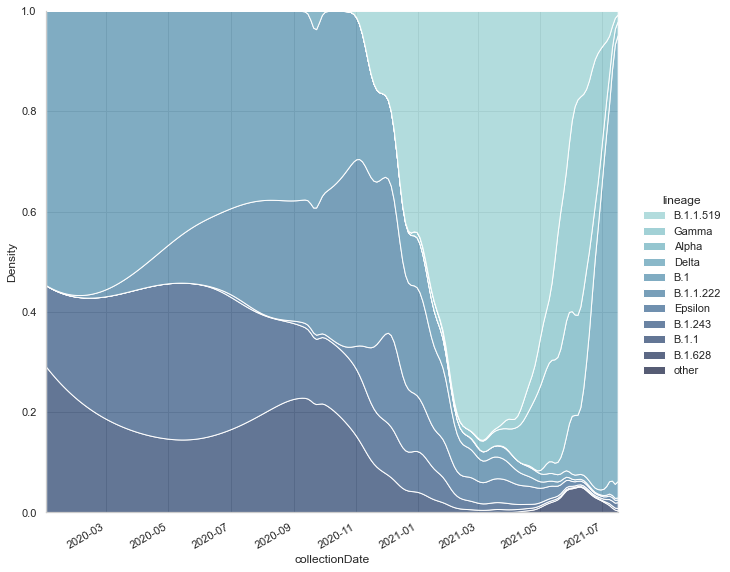

In [31]:
sns.set_theme(style="whitegrid")
sns.displot(dfTop10, x="collectionDate", hue="lineage", hue_order=legendTop10, kind="kde",
            height=9, multiple="fill", cut=0, palette="ch:rot=-.25,hue=1,light=.75").fig.autofmt_xdate();

plt.savefig("../figures/{}_top_10_variants.png".format(states_widget).replace(" ", "_"), bbox_inches="tight")

Estados Unidos Mexicanos:
We can that B.1.1.519 variant was mostly ocuppying mexico cases at the beggining of 2021 but then Gamma and alpha start taking over with their increase rates, but the concerning thing is that the delta vatiant in only the last 2 months its has been taking over which could be a bad omen due the different aggressiveness of this variant meaning the case rate could increase drastically.

## Distribution Plot of the variants of concern on the state of interest

In [32]:
variants_concern = ['Delta','Alpha','Beta','Gamma']
#['AY.1','AY.2','AY.3','AY.3.1','B.1.1.7','B.1.351','B.1.351.2','B.1.351.3','B.1.617.2','P.1','P.1.1','P.1.2']

In [33]:
variants_concern = np.append(variants_concern,'other')
variants_concern

array(['Delta', 'Alpha', 'Beta', 'Gamma', 'other'], dtype='<U5')

In [34]:
df_variants_concern['lineage'] = df_variants_concern['lineage'].apply(lambda x: x if x in variants_concern else 'other')

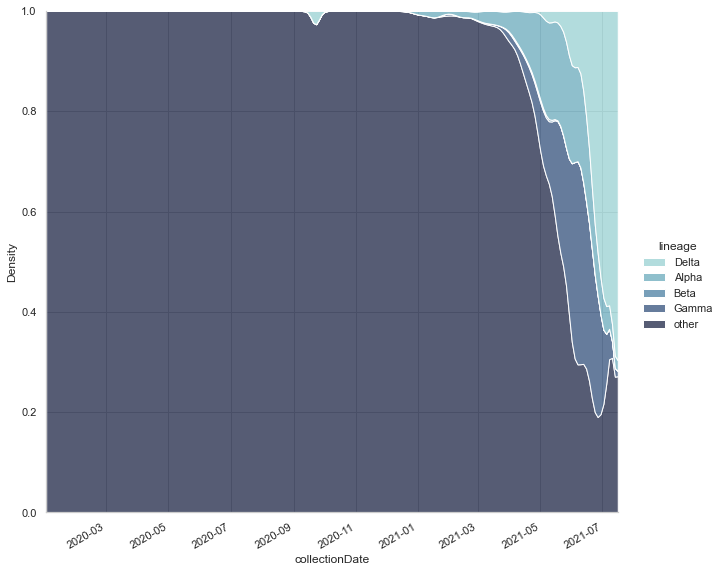

In [35]:
sns.set_theme(style="whitegrid")
concernPlot = sns.displot(df_variants_concern, x="collectionDate", hue="lineage", hue_order=variants_concern, kind="kde",
            height=9, multiple="fill", cut=0, palette="ch:rot=-.25,hue=1,light=.75").fig.autofmt_xdate()
plt.savefig("../figures/{}_concern_variants.png".format(states_widget).replace(" ", "_"), bbox_inches="tight")

Due the quatity of data is hard to analyze the distribution of the variants of concern trough time.

## Distribution Plot of the variants of interest on the state of interest

In [36]:
variants_interest = ['AV.1','B.1.1.318','Epsilon','Eta','Iota','Kappa','B.1.617.3','B.1.621','B.1.621.1','C.36.3','Lambda','Zeta','Theta']
#['AV.1','B.1.1.318','B.1.427','B.1.429','B.1.525','B.1.526','B.1.617.1','B.1.617.3','B.1.621','B.1.621.1','C.36.3','C.37','P.2','P.3']

In [37]:
variants_interest = np.append(variants_interest, 'other')
variants_interest

array(['AV.1', 'B.1.1.318', 'Epsilon', 'Eta', 'Iota', 'Kappa',
       'B.1.617.3', 'B.1.621', 'B.1.621.1', 'C.36.3', 'Lambda', 'Zeta',
       'Theta', 'other'], dtype='<U9')

In [38]:
df_variants_interest['lineage'] = df_variants_interest['lineage'].apply(lambda x: x if x in variants_interest else 'other')

C:\Users\TheAl\miniconda3\envs\enlace2021_av\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


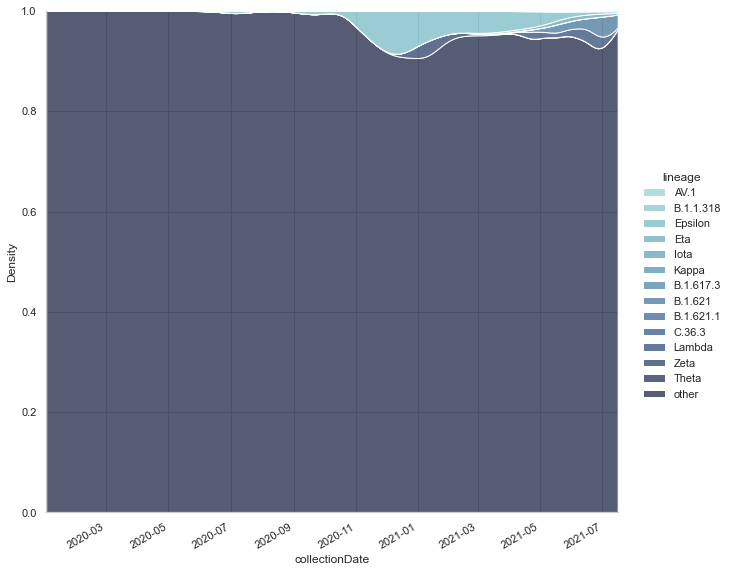

In [39]:
sns.set_theme(style="whitegrid")
interestPlot = sns.displot(df_variants_interest, x="collectionDate", hue="lineage", hue_order=variants_interest, kind="kde",
            height=9, multiple="fill", cut=0, palette="ch:rot=-.25,hue=1,light=.75").fig.autofmt_xdate()
plt.savefig("../figures/{}_interest_variants.png".format(states_widget).replace(" ", "_"), bbox_inches="tight")

Due the quatity of data is hard to analyze the distribution of the variants of interest trough time.